<a href="https://colab.research.google.com/github/g5briel/DataPUCPR1/blob/main/Exercise_L06_Feature_engineering_Data_transformation_and_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
pip install uci-dataset

In [2]:
pip install ucimlrepo

In [4]:
# Instalação da biblioteca necessária
!pip install ucimlrepo

# Importando as bibliotecas e funções necessárias
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Carregando o dataset
real_estate_valuation = fetch_ucirepo(id=477)

# Dados (como dataframes pandas)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets.squeeze()

# Configurando a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Abordagens para transformação de features e modelos
pipelines = [
    ('Linear Regression', LinearRegression()),
    ('Linear Regression with Standardization', Pipeline([
        ('StandardScaler', StandardScaler()),
        ('LinearRegression', LinearRegression())
    ])),
    ('Linear Regression with Normalization', Pipeline([
        ('MinMaxScaler', MinMaxScaler()),
        ('LinearRegression', LinearRegression())
    ])),
    ('Polynomial Features (degree=2) + Linear Regression', Pipeline([
        ('PolynomialFeatures', PolynomialFeatures(degree=2)),
        ('LinearRegression', LinearRegression())
    ])),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Avaliando cada configuração usando validação cruzada
scores = {}
for name, model in pipelines:
    score = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    scores[name] = np.sqrt(-score.mean())  # Convertendo para RMSE

# Exibindo os resultados
for model, rmse in scores.items():
    print(f"{model}: RMSE = {rmse:.2f}")


Linear Regression: RMSE = 8.89
Linear Regression with Standardization: RMSE = 8.89
Linear Regression with Normalization: RMSE = 8.89
Polynomial Features (degree=2) + Linear Regression: RMSE = 8.09
Decision Tree: RMSE = 9.78
Random Forest: RMSE = 7.46


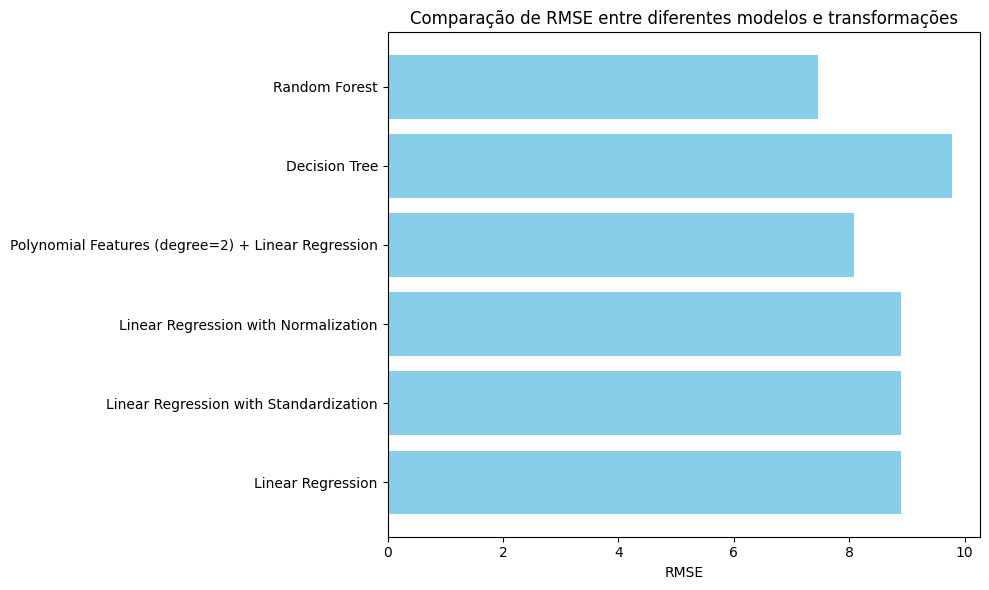

In [5]:
# Certifique-se de que todas as bibliotecas necessárias estão instaladas
!pip install ucimlrepo matplotlib

# Importando as bibliotecas e funções necessárias
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Carregando o dataset
real_estate_valuation = fetch_ucirepo(id=477)

# Dados (como dataframes pandas)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets.squeeze()

# Configurando a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Abordagens para transformação de features e modelos
pipelines = [
    ('Linear Regression', LinearRegression()),
    ('Linear Regression with Standardization', Pipeline([
        ('StandardScaler', StandardScaler()),
        ('LinearRegression', LinearRegression())
    ])),
    ('Linear Regression with Normalization', Pipeline([
        ('MinMaxScaler', MinMaxScaler()),
        ('LinearRegression', LinearRegression())
    ])),
    ('Polynomial Features (degree=2) + Linear Regression', Pipeline([
        ('PolynomialFeatures', PolynomialFeatures(degree=2)),
        ('LinearRegression', LinearRegression())
    ])),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Avaliando cada configuração usando validação cruzada e armazenando os resultados
model_names = []
rmse_scores = []
for name, model in pipelines:
    score = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    model_names.append(name)
    rmse_scores.append(np.sqrt(-score.mean()))  # Convertendo para RMSE

# Gerando o gráfico
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_scores, color='skyblue')
plt.xlabel('RMSE')
plt.title('Comparação de RMSE entre diferentes modelos e transformações')
plt.tight_layout()
plt.show()
